In [1]:
# Importing packages
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import splitfolders

In [2]:
# Opening data
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/100-bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# List of names
names = os.listdir("train")
num_of_bird_groups = len(os.listdir("train"))
print(num_of_bird_groups)

names_test = os.listdir("test")
x = len(os.listdir("test"))
print(x)

400
400


In [3]:
dirs = ["train", "valid", "test", "images to test"]
print(len(names))
print(len(os.listdir(dirs[0])))
i=0
target_class = names[i]
target_folder = dirs[0] + "/" + target_class
print((os.listdir(target_folder), 1)[0][i])
print(os.listdir(target_folder))

400
400
001.jpg
['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '074.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.jpg', '081.jpg', '082.jpg', '083.jpg', '084.jpg', '085.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '090

In [4]:
# Building list of all paths
alles = []
for i in range(len(names)):
    target_class = names[i]
    target_folder = dirs[0] + "/" + target_class
    alles.append(os.listdir(target_folder))
arr = np.array(alles)

alles_test = []
for i in range(len(names_test)):
    target_class = names_test[i]
    target_folder = dirs[2] + "/" + target_class
    alles_test.append(os.listdir(target_folder))
arr_test = np.array(alles_test)

C:\Users\Max\AppData\Local\Temp/ipykernel_20216/1020334352.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(alles)


In [6]:
# Transform jpg into array
from PIL import Image
from numpy import asarray

In [7]:
target_class = names[0]
target_folder = dirs[0] + "/" + target_class
image = Image.open(target_folder + "/" + arr[0][0])
image.resize((30,30))
data = asarray(image)
print(data.shape)

(224, 224, 3)


In [48]:
# Building actual model
# I am checking if the assumptions is good - if the accuracy will rise as n rises we are good to
# extend the model to whole dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random 

iterations = []
scores = []

cut = 50
step = 5

for n_iterations in range(1,30):
    
    iterations.append(n_iterations)
    
    #set X_train as an array of first n pictures of every bird
    #here: transform pictures into arrays
    X = []
    for n in range(n_iterations):
        for i in range(len(arr)):
            target_class = names[i]
            target_folder = dirs[0] + "/" + target_class
            image = Image.open(target_folder + "/" + arr[i][n])
            data = asarray(image)
            X.append(data)
        
    X_arr = np.array(X)
    np.mean(X_arr, axis= 0)
    
    #transform an array from 4D to 2D
    combined = []
    for i in range(X_arr.shape[0]):
        x = []
        for j in range(0, X_arr.shape[1], step):
            for k in range(0, X_arr.shape[2], step):
                for l in range(X_arr.shape[3]):
                    x.append(X_arr[i][j][k][l])
        combined.append(x)

    X_train = np.array(combined)
    
    #set X_test as an array one picture of every bird from test set
    Xt = []
    for i in range(len(arr)):
        target_class = names_test[i]
        target_folder = dirs[2] + "/" + target_class
        image = Image.open(target_folder + "/" + arr_test[i][0])
        data = asarray(image)
        Xt.append(data)

    X_arrt = np.array(Xt)
    
    newt = []
    for i in range(X_arrt.shape[0]):
        x = []
        for j in range(0, X_arrt.shape[1], step):
            for k in range(0, X_arrt.shape[2], step):
                for l in range(X_arr.shape[3]):
                    x.append(X_arr[i][j][k][l])
        newt.append(x)
    
    X_test = np.array(newt)
    
    print("Iteration", n_iterations, ": data ready")
    
    #set y_train as an array of bird names repeated n_iteration times
    y=names.copy()
    for i in range(n_iterations-1):
        y.extend(names)
    y_train = np.array(y)
    
    #set y_train as an array of bird names
    y2=names_test.copy()
    y_test = np.array(y2)
    
    #test the model 
    knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
    #random.shuffle(X_test)
    y_pred = knn.predict(X_test)
    
    #evaluate the model
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    print("Iteration", n_iterations, ": training done with anaccuracy of", score)


Iteration 1 : data ready
Iteration 1 : training done with anaccuracy of 0.16
Iteration 2 : data ready
Iteration 2 : training done with anaccuracy of 0.1925
Iteration 3 : data ready
Iteration 3 : training done with anaccuracy of 0.18
Iteration 4 : data ready
Iteration 4 : training done with anaccuracy of 0.2025
Iteration 5 : data ready
Iteration 5 : training done with anaccuracy of 0.195
Iteration 6 : data ready
Iteration 6 : training done with anaccuracy of 0.2175
Iteration 7 : data ready
Iteration 7 : training done with anaccuracy of 0.21
Iteration 8 : data ready
Iteration 8 : training done with anaccuracy of 0.22
Iteration 9 : data ready
Iteration 9 : training done with anaccuracy of 0.2175
Iteration 10 : data ready
Iteration 10 : training done with anaccuracy of 0.23
Iteration 11 : data ready
Iteration 11 : training done with anaccuracy of 0.225
Iteration 12 : data ready
Iteration 12 : training done with anaccuracy of 0.23
Iteration 13 : data ready
Iteration 13 : training done with 

1 iterations --> accuracy score 0.16
2 iterations --> accuracy score 0.1925
3 iterations --> accuracy score 0.18
4 iterations --> accuracy score 0.2025
5 iterations --> accuracy score 0.195
6 iterations --> accuracy score 0.2175
7 iterations --> accuracy score 0.21
8 iterations --> accuracy score 0.22
9 iterations --> accuracy score 0.2175
10 iterations --> accuracy score 0.23
11 iterations --> accuracy score 0.225
12 iterations --> accuracy score 0.23
13 iterations --> accuracy score 0.22
14 iterations --> accuracy score 0.2225
15 iterations --> accuracy score 0.2275
16 iterations --> accuracy score 0.2225
17 iterations --> accuracy score 0.22
18 iterations --> accuracy score 0.2125
19 iterations --> accuracy score 0.2125
20 iterations --> accuracy score 0.22
21 iterations --> accuracy score 0.2125
22 iterations --> accuracy score 0.2225
23 iterations --> accuracy score 0.2125
24 iterations --> accuracy score 0.2275
25 iterations --> accuracy score 0.2325
26 iterations --> accuracy sc

Text(0, 0.5, 'accuracy')

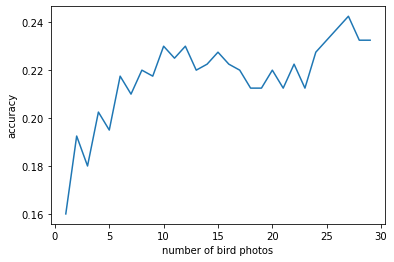

In [49]:
import matplotlib.pyplot as plt 

for i in range(len(scores)):
    print(iterations[i], "iterations --> accuracy score", scores[i])
    
plt.plot(iterations, scores)
plt.xlabel("number of bird photos")
plt.ylabel("accuracy")


In [32]:
# the same preprocessing, cheking every 5 pixel in phtoto

n_iterations = 5
step = 5

X = []
for i in range(1):
    for n in range(n_iterations):
        for i in range(len(arr)):
            target_class = names[i]
            target_folder = dirs[0] + "/" + target_class
            image = Image.open(target_folder + "/" + arr[i][n])
            data = asarray(image)
            X.append(data)
        
    X_arr = np.array(X)
    
    #transform an array from 4D to 2D
    combined = []
    for i in range(X_arr.shape[0]):
        x = []
        for j in range(0, X_arr.shape[1], step):
            for k in range(0, X_arr.shape[2], step):
                for l in range(X_arr.shape[3]):
                    x.append(X_arr[i][j][k][l])
        combined.append(x)

    X_train = np.array(combined)
    
    #set X_test as an array one picture of every bird from test set
    Xt = []
    for i in range(len(arr)):
        target_class = names_test[i]
        target_folder = dirs[2] + "/" + target_class
        image = Image.open(target_folder + "/" + arr_test[i][0])
        data = asarray(image)
        Xt.append(data)

    X_arrt = np.array(Xt)
    
    newt = []
    for i in range(X_arrt.shape[0]):
        x = []
        for j in range(0, X_arrt.shape[1],step):
            for k in range(0, X_arrt.shape[2],step):
                for l in range(X_arr.shape[3]):
                    x.append(X_arr[i][j][k][l])
        newt.append(x)
    
    X_test = np.array(newt)
    
    print("Iteration", n_iterations, ": data ready")
    
    #set y_train as an array of bird names repeated n_iteration times
    y=names.copy()
    for i in range(n_iterations-1):
        y.extend(names)
    y_train = np.array(y)
    
    #set y_train as an array of bird names
    y2=names_test.copy()
    y_test = np.array(y2)

Iteration 5 : data ready


In [33]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
print( "Logistic regreession accuracy:", accuracy_score(y_test, y_pred) )

Logistic regreession accuracy: 0.9975


C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X_train,y_train)
y_pred p svm.predict(X_test)
print( "SVM accuracy:", accuracy_score(y_test, y_pred) )

In [34]:
#SVM
from sklearn.svm import LinearSVC 

svm = LinearSVC().fit(X_train,y_train) 
y_pred = svm.predict(X_test) 
print( "SVM accuracy:", accuracy_score(y_test, y_pred) )

SVM accuracy: 0.9975


C:\Users\Max\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
#Random Forest  using 5-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {'max_depth': [1, 3, 5, 7, 9]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv = 5)
grid_search_rf.fit(X_train, y_train)

y_pred = grid_search_rf.predict(X_test) 
print( "Random Forest accuracy:", accuracy_score(y_test, y_pred) )


Random Forest accuracy: 0.1775


In [43]:
#random check
from math import floor
import random

random = floor(random.random()*400)
X_train = np.array(combined)
    
#set X_test as an array one picture of every bird from test set
target_class = names_test[random]
target_folder = dirs[2] + "/" + target_class
image = Image.open(target_folder + "/" + arr_test[random][0])
print(names_test[random])
image.show()
data = asarray(image)
Xt.append(data)

X_arrt = np.array(Xt)
    
newt = []
for i in range(X_arrt.shape[0]):
    x = []
    for j in range(0, X_arrt.shape[1],step):
        for k in range(0, X_arrt.shape[2],step):
            for l in range(X_arr.shape[3]):
                x.append(X_arr[i][j][k][l])
    newt.append(x)
    
X_test = np.array(newt)
    
print("Iteration", n_iterations, ": data ready")
    
#set y_train as an array of bird names repeated n_iteration times
y=names.copy()
y_train = np.array(y)
    
#set y_train as an array of bird names
y2=names_test[random]
y_test = np.array(y2)

#Showing random picture
y_lr = lr.predict(X_test)
print("Logistic Regression prediction: ", y_lr)
y_svm = lr.predict(X_test)
print("SVM prediction: ", y_svm)
y_rf = grid_search_rf.predict(X_test) 
print("SVM prediction: ", y_rf)


DUSKY LORY
Iteration 5 : data ready
Logistic Regression prediction:  ['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL']
SVM prediction:  ['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL']
SVM prediction:  ['GO AWAY BIRD' 'CINNAMON FLYCATCHER' 'YELLOW HEADED BLACKBIRD']
